In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras import layers
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,ridge_regression


In [18]:
def split(word): 
    return " ".join([char for char in word])

In [140]:
df=pd.read_csv("data 2.csv",names=["label","sentence"])
df=df.dropna()

In [141]:

>>> sentences = df['sentence'].values
>>> y = df['label'].values
sentences

array(['soso', 'alfat', 'assma', ..., 'layan', 'hilin', 'aboalrood'],
      dtype=object)

In [142]:
>>> sentences_train, sentences_test, y_train, y_test = train_test_split(
...    sentences, y, test_size=0.25, random_state=400)

In [143]:
sentences_test

array(['husyin', 'waten', 'mikhaiel', ..., 'memo', 'mram', 'sese'],
      dtype=object)

In [147]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [148]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoder.classes_

array(['__label__Both', '__label__Famele', '__label__Male',
       '__label__None'], dtype=object)

In [149]:
y=encoder.transform(y_train)
y

array([1, 2, 1, ..., 2, 1, 3])

In [150]:

def convert_one_hot(ytrain):
    encoder = LabelEncoder()
    y_train_nn = encoder.fit_transform(ytrain)
    y_train_nn
    encoder = OneHotEncoder(sparse=False)
    y_train_nn = y_train_nn.reshape(len(y_train_nn), 1)
    y_train_nn=encoder.fit_transform(y_train_nn)
    return y_train_nn
y_train_nn=convert_one_hot(y_train)
y_test_nn=convert_one_hot(y_test)

In [110]:
maxlen=7
tokenizer = Tokenizer(num_words=127,char_level=1)
tokenizer.fit_on_texts(sentences_train)

In [151]:

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

    # Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

    # Pad sequences with zeros
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [152]:
import numpy as np

def create_embedding_matrix(vocab, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for voc in vocab:
#         if voc in word_index:
        embedding_matrix[word_index[voc]]= np.array(
                    model_ft.get_word_vector(voc), dtype=np.float32)[:embedding_dim]
            
#     with open(filepath) as f:
#         for line in f:
#             word, *vector = line.split()
#             if word in word_index:
#                 idx = word_index[word] 
#                 embedding_matrix[idx] = np.array(
#                     vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix
len(model_ft.words)

127

In [113]:
vocab=[]
for k,v in tokenizer.word_index.items():
    vocab.append(k)
len(vocab)

218

In [114]:
>>> embedding_dim = 300
>>> embedding_matrix = create_embedding_matrix(vocab,tokenizer.word_index, embedding_dim)

In [136]:
embedding_dim = 300

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen,weights=[embedding_matrix]))
model.add(layers.LSTM(units=128,return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.Conv1D(64, 1, activation='relu'))
# model.add(layers.LSTM(units=128,return_sequences=True))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 7, 300)            65700     
_________________________________________________________________
lstm_8 (LSTM)                (None, 7, 128)            219648    
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 128)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 7, 64)             8256      
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
_________________________________________________________________
dense_15 (Dense)             (None, 4)                

In [137]:
history=model.fit(X_train,y_train_nn,epochs=25,validation_split=0.2)

Epoch 1/25
180/180 [==============================] - 10s 30ms/step - loss: 1.0285 - accuracy: 0.4788 - val_loss: 0.7838 - val_accuracy: 0.6639
Epoch 2/25
180/180 [==============================] - 5s 25ms/step - loss: 0.7596 - accuracy: 0.6855 - val_loss: 0.7726 - val_accuracy: 0.6820
Epoch 3/25
180/180 [==============================] - 5s 26ms/step - loss: 0.7217 - accuracy: 0.6862 - val_loss: 0.7614 - val_accuracy: 0.6848
Epoch 4/25
180/180 [==============================] - 4s 24ms/step - loss: 0.7064 - accuracy: 0.7038 - val_loss: 0.7323 - val_accuracy: 0.7133
Epoch 5/25
180/180 [==============================] - 4s 25ms/step - loss: 0.6820 - accuracy: 0.7242 - val_loss: 0.7966 - val_accuracy: 0.6534
Epoch 6/25
180/180 [==============================] - 4s 25ms/step - loss: 0.6874 - accuracy: 0.7196 - val_loss: 0.7231 - val_accuracy: 0.7042
Epoch 7/25
180/180 [==============================] - 4s 24ms/step - loss: 0.6536 - accuracy: 0.7316 - val_loss: 0.7209 - val_accuracy: 0.702

In [154]:
model.evaluate(X_train,y_train_nn)

225/225 [==============================] - 2s 8ms/step - loss: 0.3892 - accuracy: 0.8892


[0.3892289400100708, 0.8891828060150146]

In [139]:
model.save("best_model_with_accuercy_78.h5")

In [270]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

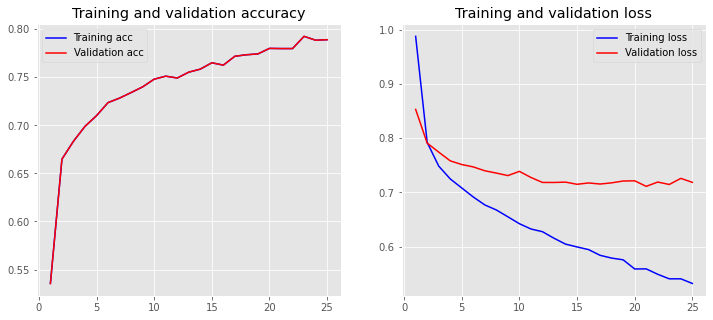

In [271]:
plot_history(histor)

In [198]:
model=load_model("best_model.h5")

In [200]:
model.evaluate(X_train,y_train_nn)

225/225 [==============================] - 1s 3ms/step - loss: 1.3324 - accuracy: 0.6138


[1.3324494361877441, 0.6138103604316711]

In [164]:
m=0
f=0
b=0
n=0


for i in y_test:
    if i =="__label__Male":
        m+=1
    elif i =="__label__Famele":
        f+=1
    elif i=="__label__Both":
        b+=1
    else:
        n+=1
summ=m+n+f+b
print(m/summ,f/summ,b/summ,n/summ)

0.44592901878914404 0.4780793319415449 0.055532359081419624 0.02045929018789144


In [3]:
df=pd.read_csv("data 2.csv",names=["label","sentence"])

In [9]:
sentenc=df['sentence'].apply(split)

In [11]:
sentenc.to_csv("names.csv",index=0)

In [12]:
import fasttext as ft


In [14]:
model_ft=ft.train_unsupervised("names.csv",minn=1,maxn=1,dim=300)

In [16]:
model_ft.words

127

In [156]:
import pickle
with open('encoder.pickle', 'wb') as handle:
        pickle.dump(encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)